In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False #显示中文和正负号
%config InlineBackend.figure_format='svg' #增加清晰度
from pandas import DataFrame
#可视化显示在页面
plt.style.use('ggplot')
#设定绘图风格
%matplotlib inline

## 0 首先读取数据并进行数据的预处理
#user_id：用户ID

#order_dt：购买日期

#order_products：购买产品数

#order_amount：购买金额

In [3]:
columns=['user_id','order_dt','order_products','order_amount'] #对初始列索引按照以上要求命名
df=pd.read_csv(r'D:\notebook\data20200206\CDNOW_master.txt',sep='\s+',names=columns)#sep将行间距增加空字符串隔开增加可读性
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


- 从数据信息来看，各个序列数据个数一样没有空值需要排除，同时order_dt列下，时间序列显示是int64后续需要修改成时间格式

In [5]:
df['order_dt']=pd.to_datetime(df['order_dt'],format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


- 修改完毕再次查看info已经完成时间序列的修改

In [6]:
df.describe()

,user_id,order_products,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


### 客户消费数据分析概括
- 用户购买产品平均数为2.41 中位数为2，且单笔购买最大值为99 整体数据偏右 并有极值干扰
- 用户购买金额平均数为35.89，中位数为25.98 最大值为1286 数据偏右，并存在极值干扰
- 说明大部分用户只消费了少数产品

### 1. 进行用户消费趋势的分析（按月）
- 对用户个体消费分成以下五个部分分析：

- 1.1 每月的消费总金额
- 1.2 每月的消费次数
- 1.3 每月产品购买量
- 1.4 每月消费人数
- 1.5 每月用户平均消费金额趋势
- 1.6 每月用户平均消费次数分析


### ***由于astype只能对np。array有效，所以要将Series  df['order_dt']用values转换成ndarray的格式才可以用***

In [7]:
# 既然按月消费那就需要一个新的列按月排列
df['month']=df.order_dt.values.astype('datetime64[M]')
df.head()

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [8]:
#1.1 每月的消费总金额 groupby的方法和pivot的方法
df.groupby('month')['order_amount'].sum()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

In [9]:
pd.pivot_table(df,index='month',values='order_amount',aggfunc='sum').reset_index()

,month,order_amount
0,1997-01-01,299060.17
1,1997-02-01,379590.03
2,1997-03-01,393155.27
3,1997-04-01,142824.49
4,1997-05-01,107933.30
5,1997-06-01,108395.87
6,1997-07-01,122078.88
7,1997-08-01,88367.69
8,1997-09-01,81948.80
9,1997-10-01,89780.77


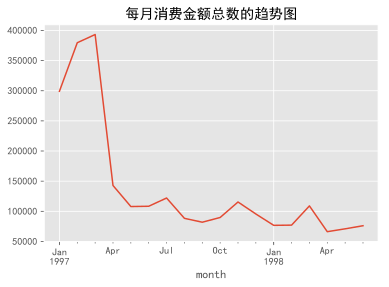

In [10]:
df.groupby('month')['order_amount'].sum().plot(title='每月消费金额总数的趋势图')

- 从图中可以看出1997年1-3月消费金额爆发式增长，此后到4月份断崖下跌，然后逐月波段递减，

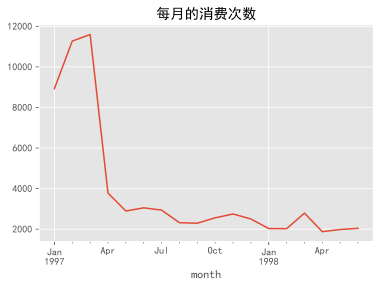

In [11]:
##1.2 每月的消费次数
df.groupby('month')['user_id'].count().plot(title='每月的消费次数')

- 和每月消费金额成正比，也是经历三个月峰值急剧下降，全年平稳下降，前三个月消费订单在10000次左右，后续在2500左右波动

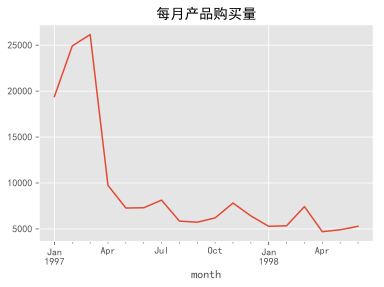

In [19]:
#1.3 每月产品购买量
df.groupby('month')['order_products'].sum().plot(title='每月产品购买量')

In [13]:
#1.4 每月消费人数
df.groupby(['month','user_id']).count().reset_index().groupby('month')['user_id'].count()
#方法1这里思路是把月份和userid先拆出来然后再分组，就是说先拆出来每个月份内购买的用户id，
#count计算了用户每个月购买个数，直接就自动去重了单个用户重复出现在一个月的现象。
#去重结束后剩下的都是非重复值再进行 month和user_id之间的计数运算

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

In [14]:
df.groupby('month')['user_id'].apply(lambda x: len(x.drop_duplicates())) #x代表month序列下的每一个user_id
#方法2用函数思维去重，将以每月为基础的user_id 进行去重运算，len代表长度，也就是每个月份中去重后user的数量

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

In [28]:
s=df.groupby('month')['user_id'].apply(lambda x: x.drop_duplicates().count())
s
#方法3得出的结果也是一样的，直接对去重后值进行计数，计数结果返回month下

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

- 1.1 每月的消费总金额
- 1.2 每月的消费次数
- 1.3 每月产品购买量
- 1.4 每月消费人数
- 当然可以用数据透视表直接将前三个问题直接解决

In [54]:
df.pivot_table( index='month',
                values=['order_amount','order_products','user_id'],
                aggfunc={'order_amount':'sum','order_products':'sum','user_id':'count'}
)

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


- 1.5 每月用户平均消费金额趋势 求mean
- 1.6 每月用户平均消费次数分析 求count

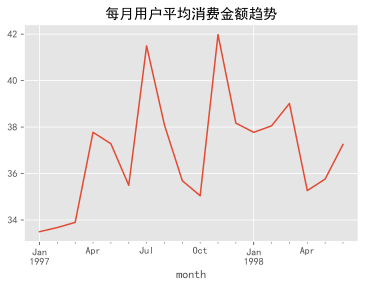

In [37]:
df.groupby('month')['order_amount'].mean().plot(title='每月用户平均消费金额趋势')

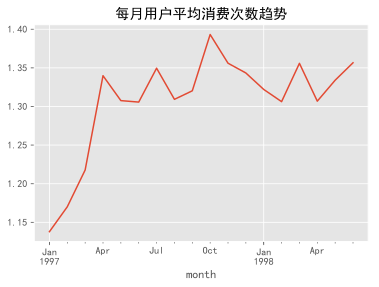

In [43]:
(df.groupby('month')['user_id'].count()/s).plot(title='每月用户平均消费次数趋势')

## 2  用户个体消费分析
- 2.1 用户消费金额。消费数量的统计描述
- 2.2 用户消费金额和数量的散点图
- 2.3 用户消费金额的分布图
- 2.4 用户消费数量的分布图
- 2.5 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [60]:
#2.1 用户消费金额。消费产品数量的统计描述
df.groupby('user_id').agg({'order_products':'count','order_amount':'sum'}).describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,2.955409,106.080426
std,4.736558,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,1.000000,43.395000
75%,3.000000,106.475000
max,217.000000,13990.930000


In [61]:
#2.1 用户消费金额。消费产品数量的统计描述
df.groupby('user_id').sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 用户消费金额 平均值106 中位数43 最大值13660 说明极值干扰抬高了平均数
- 用户平均消费7.1张CD，中位数是3张，最大值1033张，极值干扰

In [66]:
#2.2 用户消费金额和数量的散点图
df.groupby('user_id').sum().query('order_amount<3000').plot.scatter(x='order_amount',y='order_products')

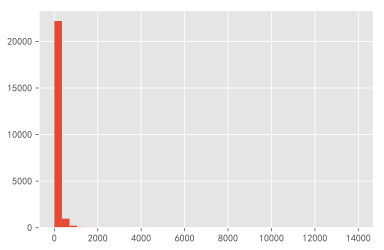

In [74]:
#2.3 用户消费金额的分布图
df.groupby('user_id').sum().order_amount.hist(bins=40)


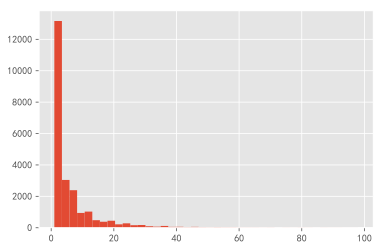

In [106]:
#2.4 用户消费数量的分布图
df.groupby('user_id').sum().query('order_products<100').order_products.hist(bins=40)

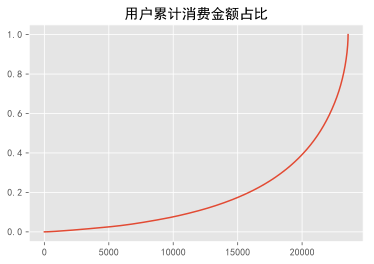

In [91]:
#2.5 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）
a=df.groupby('user_id').sum().sort_values('order_amount')
#函数思维就是
# df.groupby('user_id').sum().sort_values('order_amount').apply(lambda x: x.cumsum()/x.sum())
a.cumsum()#累加计算
a1=a.cumsum()/a.cumsum().max()
a1.reset_index().order_amount.plot(title='用户累计消费金额占比').grid(b=True)

- x轴是用户数量，y轴是销售额占比，按用户消费金额进行升序排序，由图可知50%的用户仅贡献了15%的销售额度。
- 而排名前***4000多的用户就贡献了60%的消费额。***也就是说我们只要维护了这4000个用户就可以把业绩KPI完成60%，
- 如果能把4000个用户运营的更好就可以占比70%—80%之间。

In [104]:
#***2.6拓展一下计算下前10%的头部用户贡献收入的百分比是多少***
#23570是用户总数 10%就是前2357的客户
a[21213:23570].sum()/a.sum()


order_products    0.501891
order_amount      0.509427
dtype: float64

- 从计算结果可以看出，头部10%的用户贡献了50.94%的消费总额一半以上。需要好好维护

## 3 用户消费行为分析

- 3.1用户第一次消费的月份分布，和人数统计（绘制线形图）首购
- 3.2用户最后一次消费的月份分布，和人数统计（绘制线形图）
- 3.3新老客户占比（消费一次为新用户，消费多次为老用户）
- 3.4分析每一个用户的第一次消费何最后一次消费的时间
- 3.5对分组后的结果进行聚合
- 3.6分析新老用户的消费比例
- 3.7用户分层
    - 分析得出每个用户的购买总量和消费金额，和最近一次消费时间的表格rmf *rfm模型设计
    - R表示最近一次交易时间的间隔（np。timedelta64（1，‘d’）去去除day字符串）
    - F表示客户的购买商品的总数量 越大越频繁
    - M表示客户交易金额，越大客户价值越高，越小价值越低 将R，F，M作用在rfm表中
    - 根据价值分层对
    - 重要价值客户
    - 重要保持客户
    - 重要挽留客户
    - 重要发展客户
    - 一般价值客户
    - 一般保持客户
    - 一般挽留客户
    - 一般发展客户

- 3.1用户第一次消费的月份分布，和人数统计（绘制线形图）首购

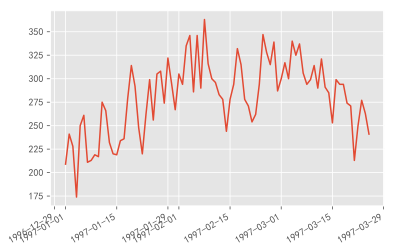

In [128]:
df.groupby('user_id').min().order_dt.value_counts().plot() #对时间进行去重统计，可以统计出每个时间节点，购买的人数

- 3.2用户最后一次消费的月份分布，和人数统计（绘制线形图）

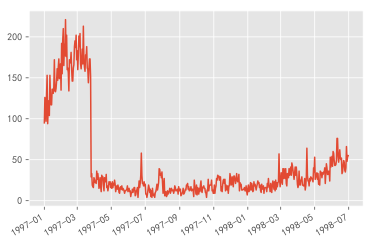

In [122]:
df.groupby('user_id').max().order_dt.value_counts().plot()

## 根据用户最后一次消费图形可知，四月份用户最后一次消费断崖，很多用户在1-3月消费了一次就不再消费了 

- 3.3新老客户占比（消费一次为新用户，消费多次为老用户）

In [133]:
dfmix=df.groupby('user_id')['order_dt'].agg(['min','max'])

In [141]:
(dfmix['min']==dfmix['max']).value_counts() ##value_counts顾名思义就是对数值进行计数，

True     12054
False    11516
dtype: int64

In [143]:
12054/11516


1.0467176102813478

- 3.7用户分层
    - 分析得出每个用户的购买总量和消费金额，和最近一次消费时间的表格rmf *rfm模型设计
    - R表示最近一次交易时间的间隔（np。timedelta64（1，‘d’）去去除day字符串）
    - F表示客户的购买商品的总数量 越大越频繁
    - M表示客户交易金额，越大客户价值越高，越小价值越低 将R，F，M作用在rfm表中
    - 根据价值分层对
    - 重要价值客户
    - 重要保持客户
    - 重要挽留客户
    - 重要发展客户
    - 一般价值客户
    - 一般保持客户
    - 一般挽留客户
    - 一般发展客户

In [172]:
#析得出每个用户的购买总量和消费金额，和最近一次消费时间的表格rmf *rfm模型设计
rfm1=df.pivot_table(index='user_id',
              
              aggfunc={'order_products':'sum','order_amount':'sum','order_dt':'max'})
rfm1.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [182]:
#用户消费最后一次消费的时间间隔,由于数据间隔太远，从该组数据的最后一日作为用户最后一次消费间隔
period=-(dfmix['max']-dfmix['max'].max())/np.timedelta64(1,'D')
rfm1['R']=period
rfm=rfm1.rename(columns={'order_amount':'M','order_products':'F'})
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [181]:
# pd.plotting.scatter_matrix(rfm)
# plt.show()

In [190]:
rfm[['R','F','M']].apply(lambda x: x-x.mean()).head()

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574


In [197]:
def func(x):
    level=x.apply(lambda x : '1' if x>=0 else '0' )
    label=level.R+level.F+level.M
    dic={'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'}
    result=dic[label]
    return result
rfm['label']=rfm[['R','F','M']].apply(lambda x: x-x.mean()).apply(func,axis=1)#生成的是一个名为label的标注客户等级的Series
rfm.head()

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户
2,89.00,1997-01-12,6,534.0,一般挽留客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般发展客户
5,385.61,1998-01-03,29,178.0,重要保持客户


In [201]:
rfm.groupby('label').agg({'M':'sum','F':'sum','R':'mean'})

,M,F,R
label,,,
一般价值客户,7181.28,650,471.363636
一般保持客户,19937.45,1712,142.951456
一般发展客户,196971.23,13977,179.123636
一般挽留客户,438291.81,29346,493.947350
重要价值客户,167080.83,11121,455.353240
重要保持客户,1592039.62,107789,113.585200
重要发展客户,45785.01,2023,171.105740
重要挽留客户,33028.40,1263,475.029046


In [230]:
# rfm.loc[rfm.label=='重要价值客户','color']='g'
# rfm.loc[~(rfm.label=='重要价值客户'),'color']='r'
# rfm.plot.scatter('F','R',c=rfm.color)
# s={'重要价值客户':'g',
#         '重要保持客户':'r',
#         '重要挽留客户':'b',
#         '重要发展客户':'c',
#        '一般价值客户' :'r',
#         '一般保持客户':'y',
#         '一般挽留客户':'m',
#         '一般发展客户':'w'}
# rfm.color=rfm.label.map(s)  
#散点图的应用 并对color赋值map映射

In [231]:
df

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
5,3,1997-04-02,2,19.54,1997-04-01
6,3,1997-11-15,5,57.45,1997-11-01
7,3,1997-11-25,4,20.96,1997-11-01
8,3,1998-05-28,1,16.99,1998-05-01
9,4,1997-01-01,2,29.33,1997-01-01
